# **Medical Fraud**

## Загрузка библиотек

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и обработка датасетов

Данные о пациентах

In [ ]:
patient_data = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
patient_data.info()
patient_data.describe()
patient_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,2,1,0,23,810,12,12,...,2,2,2,2,2,2,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
7,BENE11008,1934-02-01,NaN,2,1,0,15,140,12,12,...,2,1,2,2,2,2,0,0,30,0
8,BENE11009,1929-06-01,NaN,1,1,Y,44,230,12,12,...,2,1,2,2,2,2,0,0,100,0
9,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


Видим, что во всех столбцах, кроме даты смерти, нет пропусков. Пропуски в дате смерти означают, что пациент был жив на момент построения датасета. Приведем значения в столбцах с 2 уникальными значениями к бинарному виду (0, 1)

In [ ]:
cat_cols = ['Gender',
  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
  'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
  'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
  'ChronicCond_stroke', ]
for col in cat_cols:
  patient_data[col] = patient_data[col] - 1
patient_data.loc[patient_data['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1
patient_data['RenalDiseaseIndicator'] = patient_data['RenalDiseaseIndicator'].astype(int)
patient_data.head(20)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,0,1,0,39,230,12,12,...,0,0,0,1,0,0,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,1,1,0,39,280,12,12,...,1,1,1,1,1,1,0,0,30,50
2,BENE11003,1936-08-01,NaN,0,1,0,52,590,12,12,...,1,1,0,1,1,1,0,0,90,40
3,BENE11004,1922-07-01,NaN,0,1,0,39,270,12,12,...,1,0,0,0,0,1,0,0,1810,760
4,BENE11005,1935-09-01,NaN,0,1,0,24,680,12,12,...,1,0,1,1,1,1,0,0,1790,1200
5,BENE11006,1976-09-01,NaN,1,1,0,23,810,12,12,...,1,1,1,1,1,1,0,0,500,0
6,BENE11007,1940-09-01,2009-12-01,0,2,0,45,610,12,12,...,1,0,1,0,0,1,0,0,1490,160
7,BENE11008,1934-02-01,NaN,1,1,0,15,140,12,12,...,1,0,1,1,1,1,0,0,30,0
8,BENE11009,1929-06-01,NaN,0,1,1,44,230,12,12,...,1,0,1,1,1,1,0,0,100,0
9,BENE11010,1936-07-01,NaN,1,1,0,41,30,12,12,...,1,0,0,0,1,1,0,0,1170,660


Изучим распределения признаков

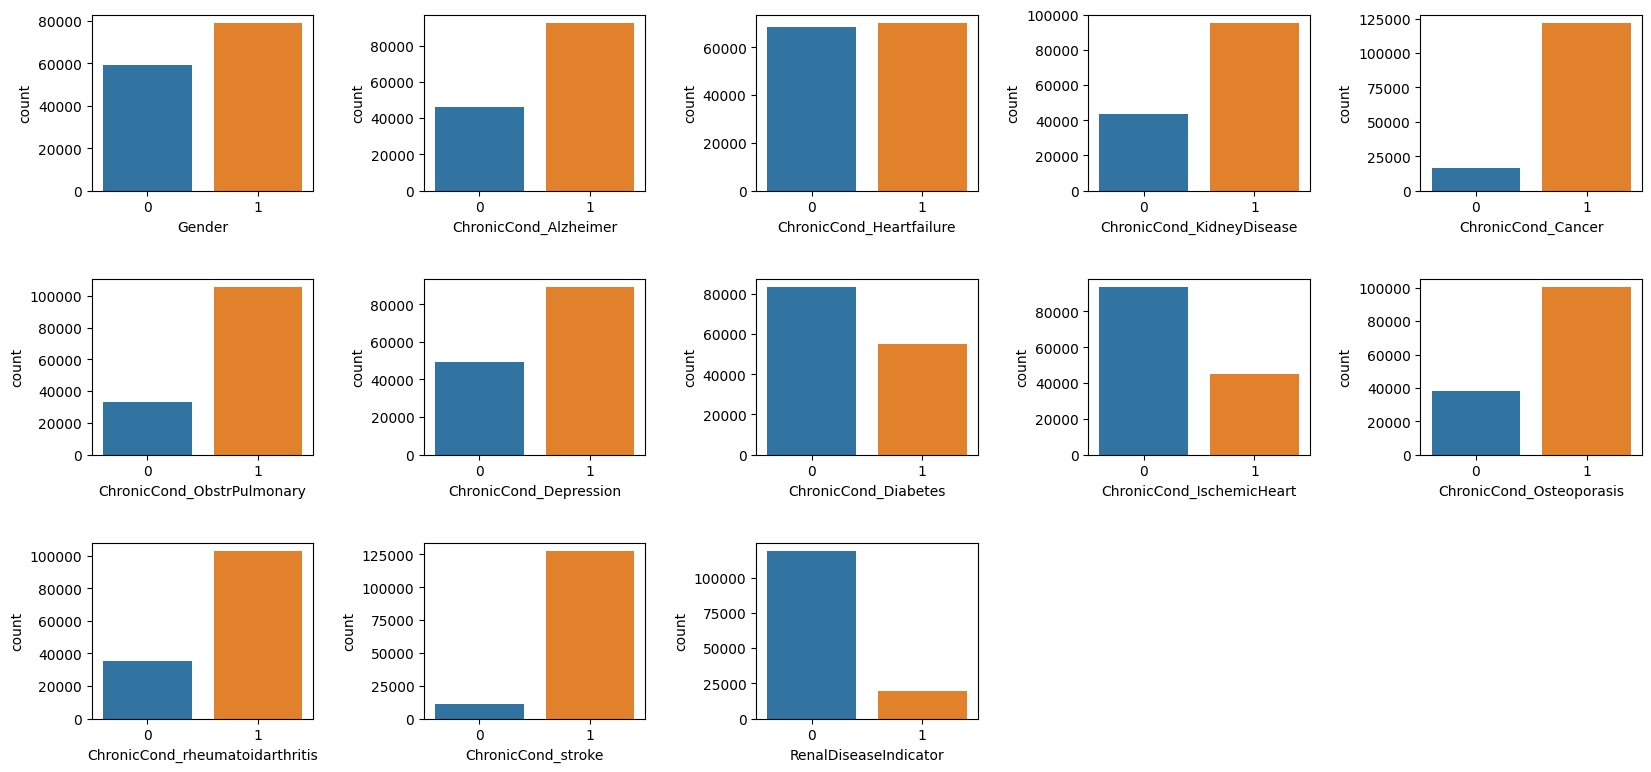

In [ ]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for (idx, col) in enumerate(cat_cols + ['RenalDiseaseIndicator']):
  ax = fig.add_subplot(5, 5, idx + 1)
  sns.countplot(patient_data, x=col)
plt.show();

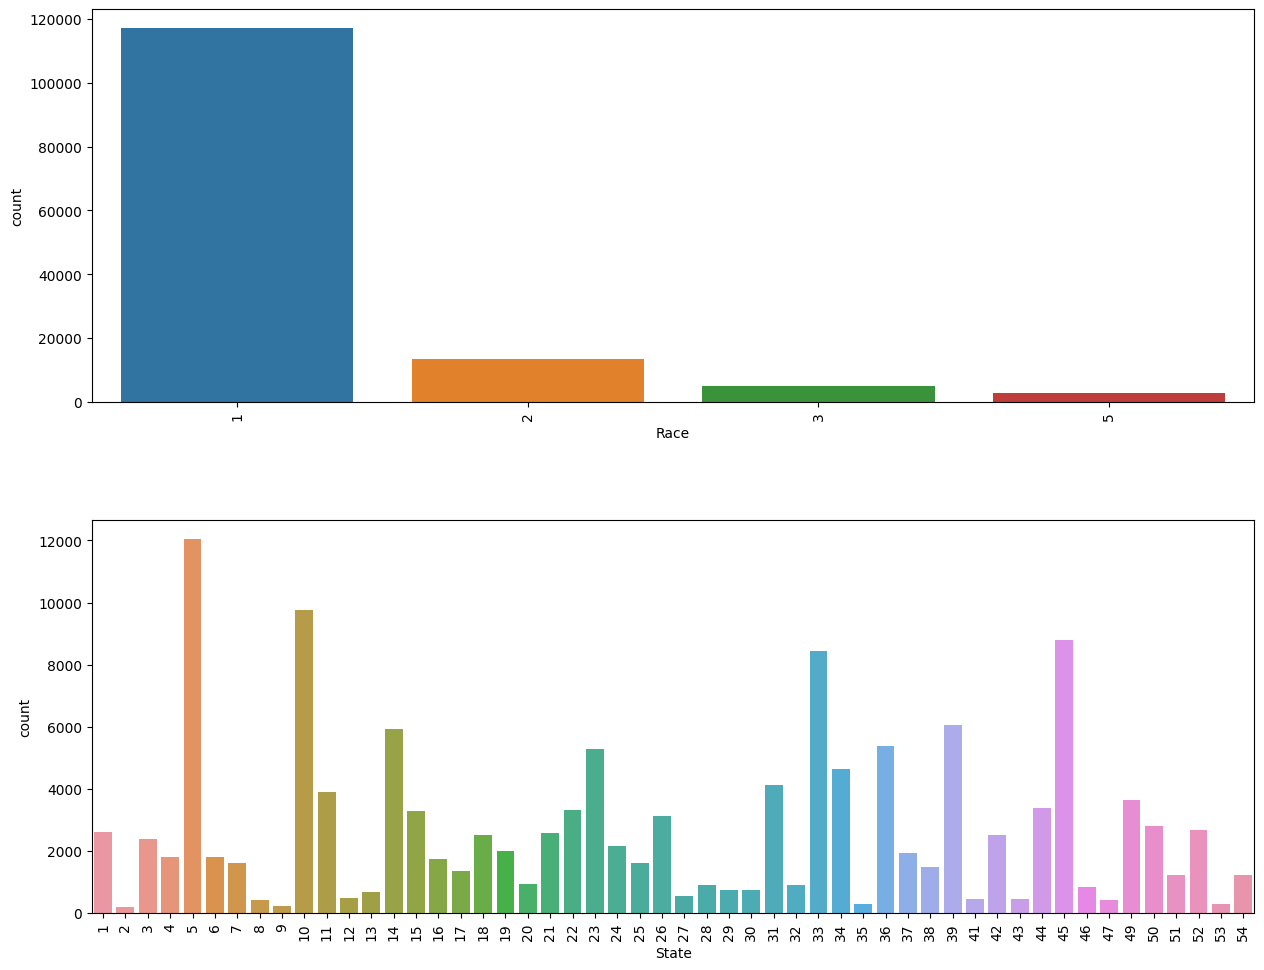

In [ ]:
fig = plt.figure(figsize=(15, 25))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for (idx, col) in enumerate(['Race', 'State']):
  ax = fig.add_subplot(4, 1, idx + 1)
  pl = sns.countplot(patient_data, x=col)
  ax.tick_params(axis='x', rotation=90)
plt.show();

<ipython-input-7-4421bb6570b9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(patient_data[col],ax=ax)
<ipython-input-7-4421bb6570b9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(patient_data[col],ax=ax)
<ipython-input-7-4421bb6570b9>:6: UserWarning: 

`distplot` is a deprecated function a

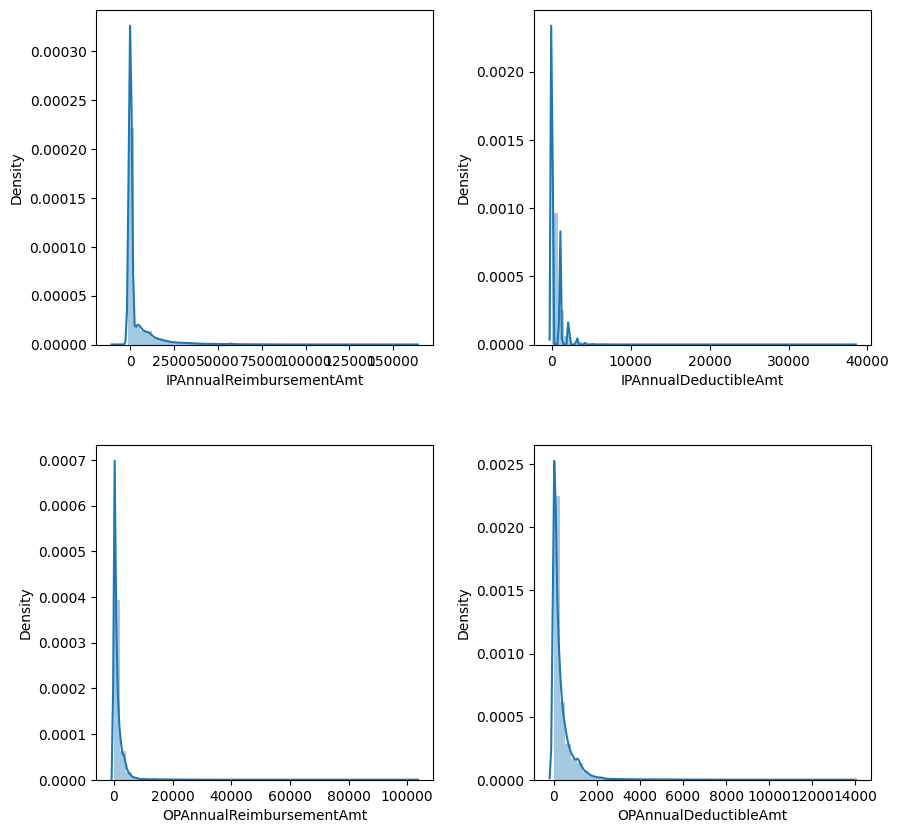

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for (idx, col) in enumerate(['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
  'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']):
  ax = fig.add_subplot(2, 2, idx + 1)
  sns.distplot(patient_data[col],ax=ax)
plt.show();

Данные о госпитализациях

In [ ]:
hosp_data = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
hosp_data.info()
hosp_data.describe()
hosp_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


Пропуски есть в некоторых видах врачей. Возможно там, где пропуски, решение принимал только один врач, например, или два.
Также присутствуют не все диагнозы и процедуры. Их также могло быть меньше, чем столбцов в таблице.
Также есть немного пропусков в DeductibleAmtPaid.

Изучим распределения признаков

<ipython-input-9-5c33f4276d0e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hosp_data[col],ax=ax)
<ipython-input-9-5c33f4276d0e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hosp_data[col],ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset 

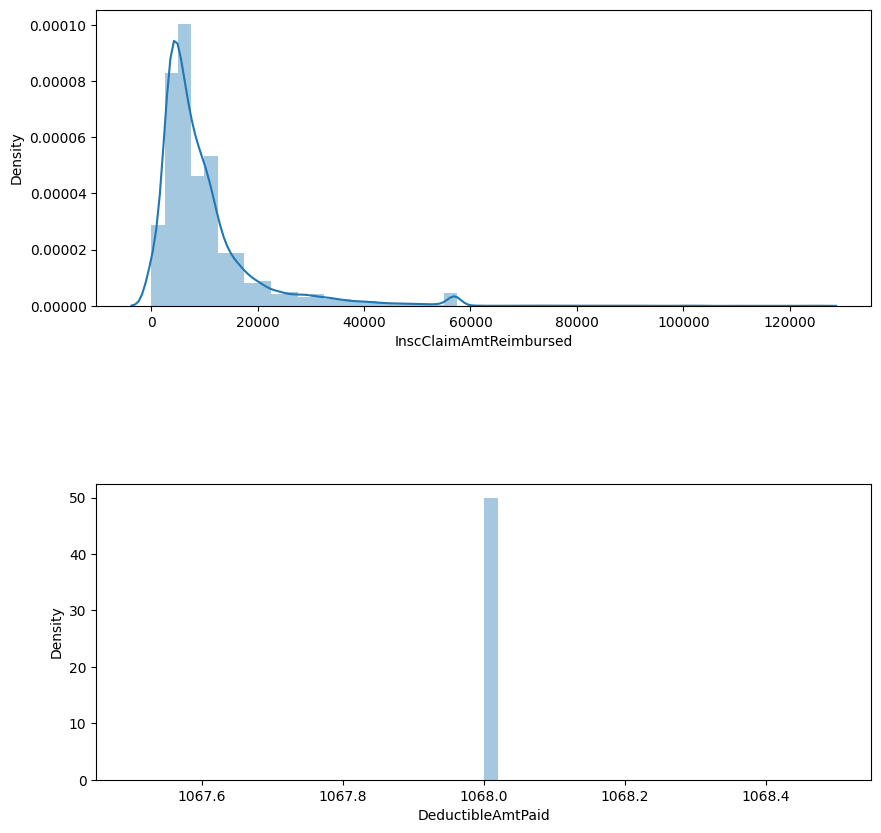

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for (idx, col) in enumerate(['InscClaimAmtReimbursed', 'DeductibleAmtPaid']):
  ax = fig.add_subplot(2, 1, idx + 1)
  sns.distplot(hosp_data[col],ax=ax)
plt.show();

Введем новый признак - длительность госпитализации в днях

<ipython-input-10-5dc1e873b178>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hosp_data['DurAmb'], bins = [x for x in range(1, hosp_data['DurAmb'].max() + 1)])


<Axes: xlabel='DurAmb', ylabel='Density'>

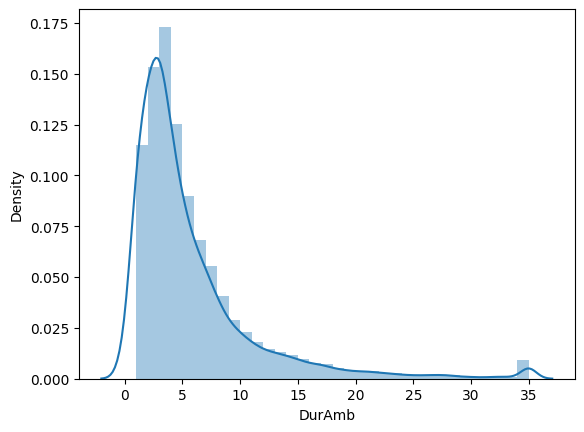

In [ ]:
hosp_data['DischargeDt'] = pd.to_datetime(hosp_data['DischargeDt'])
hosp_data['AdmissionDt'] = pd.to_datetime(hosp_data['AdmissionDt'])
hosp_data['DurAmb'] = (hosp_data['DischargeDt'] - hosp_data['AdmissionDt']).dt.days
hosp_data = hosp_data.drop(['DischargeDt', 'AdmissionDt'], axis=1)
sns.distplot(hosp_data['DurAmb'], bins = [x for x in range(1, hosp_data['DurAmb'].max() + 1)])

Данные об амбулаторном лечении

In [ ]:
out_data = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
out_data.info()
out_data.describe()
out_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Есть также пропуски во врачах, диагнозах и процедурах. А также в столбце ClmAdmitDiagnosisCode. Изучим распределение признаков.

<ipython-input-12-96eb661e417e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_data[col],ax=ax)
<ipython-input-12-96eb661e417e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_data[col],ax=ax)


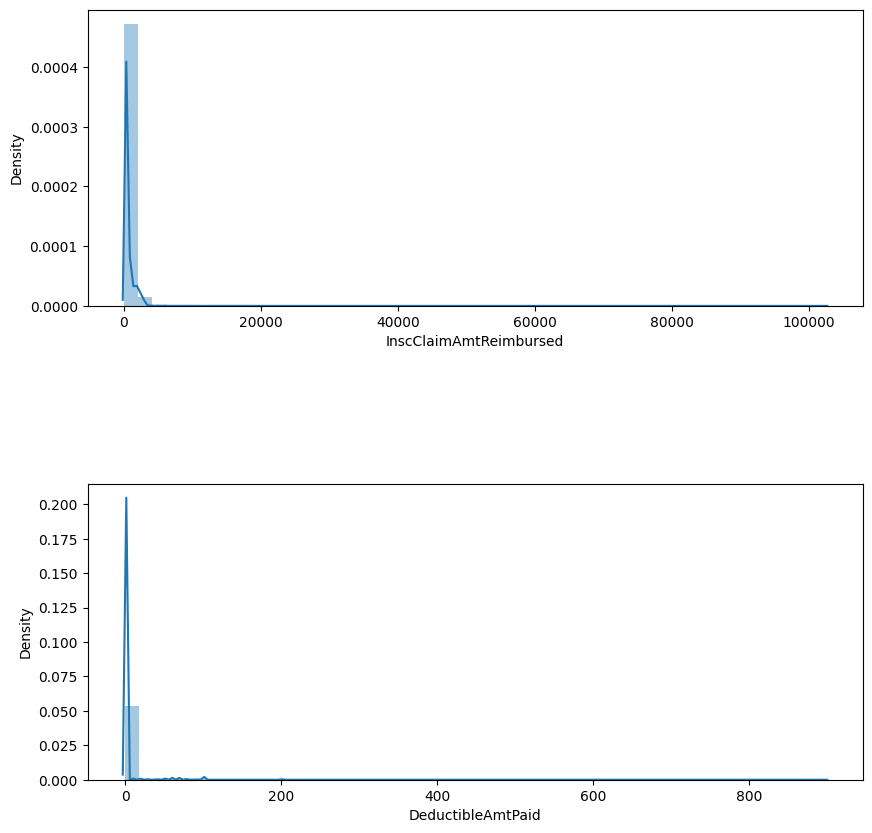

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for (idx, col) in enumerate(['InscClaimAmtReimbursed', 'DeductibleAmtPaid']):
  ax = fig.add_subplot(2, 1, idx + 1)
  sns.distplot(out_data[col],ax=ax)
plt.show();

Объединим датафреймы госпитализации и амбулаторного лечения.

In [ ]:
out_hosp_data = pd.concat([hosp_data, out_data], ignore_index=True)
out_hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  558211 non-null  object 
 1   ClaimID                 558211 non-null  object 
 2   ClaimStartDt            558211 non-null  object 
 3   ClaimEndDt              558211 non-null  object 
 4   Provider                558211 non-null  object 
 5   InscClaimAmtReimbursed  558211 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114447 non-null  object 
 8   OtherPhysician          199736 non-null  object 
 9   ClmAdmitDiagnosisCode   145899 non-null  object 
 10  DeductibleAmtPaid       557312 non-null  float64
 11  DiagnosisGroupCode      40474 non-null   object 
 12  ClmDiagnosisCode_1      547758 non-null  object 
 13  ClmDiagnosisCode_2      362605 non-null  object 
 14  ClmDiagnosisCode_3  

Введем новые признаки - длительность страхового случая и количество "проблемных" дней - разница между длительностью страхового случая и длительностью госпитализации.

<ipython-input-14-18275084ba94>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out_hosp_data['ProblemDur'])


<Axes: xlabel='ProblemDur', ylabel='Density'>

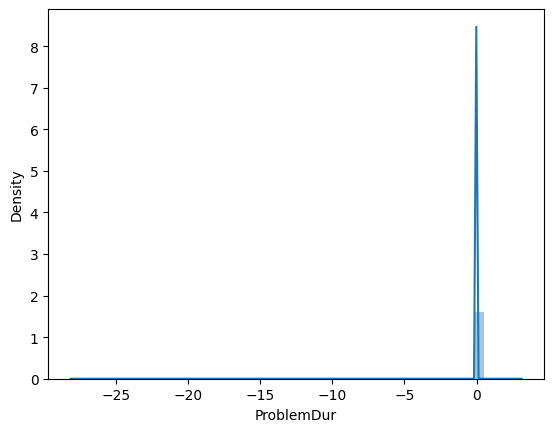

In [ ]:
out_hosp_data['ClaimEndDt'] = pd.to_datetime(out_hosp_data['ClaimEndDt'])
out_hosp_data['ClaimStartDt'] = pd.to_datetime(out_hosp_data['ClaimStartDt'])
out_hosp_data['ClaimDur'] = (out_hosp_data['ClaimEndDt'] - out_hosp_data['ClaimStartDt']).dt.days
out_hosp_data['ProblemDur'] = out_hosp_data['ClaimDur'] - out_hosp_data['DurAmb']
sns.distplot(out_hosp_data['ProblemDur'])

Объединим датафрейм со страховыми случаями с информацией о пациентах.

In [ ]:
out_hosp_data = out_hosp_data.merge(patient_data, on='BeneID', how='left')
out_hosp_data.info()
out_hosp_data.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmAdmitDiagnosisCode            145899 non-null  object        
 10  DeductibleAmtPaid                557312 non-

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,0,0,0,1,0,0,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,6186,...,0,0,0,1,0,0,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,29590,...,0,0,0,1,0,0,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,0,0,1,1,0,0,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,78321,...,0,1,0,1,1,1,21260,2136,120,100
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,1749,...,1,0,0,1,0,0,22000,2136,1400,840
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,5699,...,1,1,0,0,0,1,8000,1068,860,50
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,78605,...,1,0,0,0,1,1,6000,1068,0,0
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2859,...,1,1,0,0,1,1,23650,2136,40,0
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,41401,...,0,0,0,1,0,0,131140,2136,1650,80


Введем новый признак - возраст пациента на момент начала страхового случая.

In [ ]:
out_hosp_data['DOB'] = pd.to_datetime(out_hosp_data['DOB'])
out_hosp_data['Age'] = (out_hosp_data['ClaimStartDt'] - out_hosp_data['DOB']).dt.days//365

Посчитаем, какой по порядку страховой случай у пациента.

In [ ]:
out_hosp_data = out_hosp_data.sort_values(by=['BeneID', 'ClaimStartDt'])
out_hosp_data['DurAmb'] = out_hosp_data['DurAmb'].fillna(0)
out_hosp_data['IsAmb'] = [1 if x > 0 else 0 for x in out_hosp_data['DurAmb']]
out_hosp_data['CaseNum'] = 1
out_hosp_data['AllCaseNumBene'] = out_hosp_data.groupby(['BeneID'])['CaseNum'].cumsum()
out_hosp_data['TypeCaseNumBene'] = out_hosp_data.groupby(['BeneID', 'IsAmb'])['CaseNum'].cumsum()

Загрузим данные о фроде, приведя целевую переменную к бинарному виду.

In [ ]:
fraud_data = pd.read_csv("Train-1542865627584.csv")
fraud_data['PotentialFraud'] = [1 if x == 'Yes' else 0 for x in fraud_data['PotentialFraud']]
fraud_data.info()
fraud_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.7+ KB


,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0
5,PRV51008,0
6,PRV51011,0
7,PRV51012,0
8,PRV51013,0
9,PRV51014,0


Объединим с основным датасетом по атрибуту Provider

In [ ]:
out_hosp_data = out_hosp_data.merge(fraud_data, on='Provider', how='left')
out_hosp_data.info()
out_hosp_data.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmAdmitDiagnosisCode            145899 non-null  object        
 10  DeductibleAmtPaid                557312 non-

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsAmb,CaseNum,AllCaseNumBene,TypeCaseNumBene,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaN,...,0,0,120,30,70,0,1,1,1,1
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaN,...,0,0,120,30,71,0,1,2,2,1
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64880,...,0,0,2530,540,69,0,1,1,1,0
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,0,0,2530,540,69,0,1,2,2,1
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,78009,...,0,0,2530,540,69,0,1,3,3,0
5,BENE100001,CLM389298,2009-05-31,2009-06-05,PRV55158,20,PHY425169,NaN,NaN,V573,...,0,0,2530,540,69,0,1,4,4,0
6,BENE100001,CLM407506,2009-06-10,2009-06-10,PRV54966,300,PHY425443,PHY390959,PHY349909,NaN,...,0,0,2530,540,69,0,1,5,5,1
7,BENE100001,CLM431369,2009-06-23,2009-06-23,PRV54966,60,PHY390959,NaN,NaN,NaN,...,0,0,2530,540,69,0,1,6,6,1
8,BENE100001,CLM447782,2009-07-02,2009-07-02,PRV54966,700,PHY334905,PHY313692,PHY337051,7244,...,0,0,2530,540,69,0,1,7,7,1
9,BENE100001,CLM626521,2009-10-12,2009-10-12,PRV52145,10,PHY430032,NaN,PHY418077,42731,...,0,0,2530,540,70,0,1,8,8,0


## Построение модели

Вычислим средние по вещественным признакам для каждого провайдера.

In [ ]:
FEATURES = ['InscClaimAmtReimbursed',
  'DeductibleAmtPaid', 'DurAmb', 'ProblemDur', 'Gender', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
  'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'IsAmb', 'AllCaseNumBene',
  'TypeCaseNumBene']
res_data = out_hosp_data.groupby('Provider')[FEATURES].mean().reset_index()

Добавим детализацию признаков по расам

In [ ]:
race_sum = out_hosp_data.pivot_table(values='InscClaimAmtReimbursed',
  index=out_hosp_data['Provider'],
  columns='Race', aggfunc=['mean', 'count']).fillna(0)
race_sum.columns = ['Mean' + str(i) + 'Race' for i in [1, 2, 3, 5]] + ['Count' + str(i) + 'Race' for i in [1, 2, 3, 5]]
FEATURE_ADD = list(race_sum.columns)
FEATURES = FEATURES + FEATURE_ADD
race_sum = race_sum.reset_index()
res_data = res_data.merge(race_sum, on='Provider')
race_sum

,Provider,Mean1Race,Mean2Race,Mean3Race,Mean5Race,Count1Race,Count2Race,Count3Race,Count5Race
0,PRV51001,4956.190476,140.000000,0.0,0.0,21.0,4.0,0.0,0.0
1,PRV51003,4561.775701,4896.250000,0.0,50.0,107.0,24.0,0.0,1.0
2,PRV51004,335.000000,382.083333,560.0,0.0,120.0,24.0,5.0,0.0
3,PRV51005,239.921613,242.977099,300.0,0.0,893.0,262.0,10.0,0.0
4,PRV51007,537.413793,181.428571,0.0,0.0,58.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5405,PRV57759,364.545455,1055.000000,0.0,127.5,22.0,2.0,0.0,4.0
5406,PRV57760,243.333333,97.500000,0.0,0.0,18.0,4.0,0.0,0.0
5407,PRV57761,212.142857,188.571429,200.0,525.0,70.0,7.0,1.0,4.0
5408,PRV57762,1900.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0


Добавим к признакам количество врачей, с которыми взаимодействовал провайдер.

In [ ]:
physician_counts = out_hosp_data.groupby('Provider')['AttendingPhysician'].nunique().reset_index()
physician_counts.columns = ['Provider', 'AttendingPhysicianCount']
res_data = res_data.merge(physician_counts, on='Provider')
FEATURES = FEATURES + ['AttendingPhysicianCount']
FEATURE_ADD = FEATURE_ADD + ['AttendingPhysicianCount']

Добавим к признакам количество страховых случаев, рассмотренных провайдером.

In [ ]:
case_nums_by_prov = out_hosp_data.pivot_table(values='BeneID', index=out_hosp_data['Provider'], columns='IsAmb', aggfunc='count').fillna(0)#.reset_index()
case_nums_by_prov.columns = ['NoAmbNum', 'AmbNum']
case_nums_by_prov = case_nums_by_prov.reset_index()
case_nums_by_prov['AllCaseNum'] = case_nums_by_prov['NoAmbNum'] + case_nums_by_prov['AmbNum']
case_nums_by_prov['AmbNumRatio'] =  case_nums_by_prov['AmbNum']/case_nums_by_prov['AllCaseNum']
res_data = res_data.merge(case_nums_by_prov, on='Provider')
FEATURES = FEATURES + ['AllCaseNum', 'AmbNumRatio']
FEATURE_ADD = FEATURE_ADD + ['AllCaseNum', 'AmbNumRatio']
FEATURES.remove('IsAmb')
res_data.info()
res_data.describe()
case_nums_by_prov

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5410 entries, 0 to 5409
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider                         5410 non-null   object 
 1   InscClaimAmtReimbursed           5410 non-null   float64
 2   DeductibleAmtPaid                5409 non-null   float64
 3   DurAmb                           5410 non-null   float64
 4   ProblemDur                       2092 non-null   float64
 5   Gender                           5410 non-null   float64
 6   RenalDiseaseIndicator            5410 non-null   float64
 7   NoOfMonths_PartACov              5410 non-null   float64
 8   NoOfMonths_PartBCov              5410 non-null   float64
 9   ChronicCond_Alzheimer            5410 non-null   float64
 10  ChronicCond_Heartfailure         5410 non-null   float64
 11  ChronicCond_KidneyDisease        5410 non-null   float64
 12  ChronicCond_Cancer  

,Provider,NoAmbNum,AmbNum,AllCaseNum,AmbNumRatio
0,PRV51001,21.0,4.0,25.0,0.160000
1,PRV51003,70.0,62.0,132.0,0.469697
2,PRV51004,149.0,0.0,149.0,0.000000
3,PRV51005,1165.0,0.0,1165.0,0.000000
4,PRV51007,69.0,3.0,72.0,0.041667
...,...,...,...,...,...
5405,PRV57759,28.0,0.0,28.0,0.000000
5406,PRV57760,22.0,0.0,22.0,0.000000
5407,PRV57761,82.0,0.0,82.0,0.000000
5408,PRV57762,1.0,0.0,1.0,0.000000


In [ ]:
out_hosp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmAdmitDiagnosisCode            145899 non-null  object        
 10  DeductibleAmtPaid                557312 non-

Подготовим датафреймы.

In [ ]:
FEATURES

['InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'DurAmb',
 'ProblemDur',
 'Gender',
 'RenalDiseaseIndicator',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'Age',
 'AllCaseNumBene',
 'TypeCaseNumBene',
 'Mean1Race',
 'Mean2Race',
 'Mean3Race',
 'Mean5Race',
 'Count1Race',
 'Count2Race',
 'Count3Race',
 'Count5Race',
 'AttendingPhysicianCount',
 'AllCaseNum',
 'AmbNumRatio']

In [ ]:
list(res_data.columns.values)

['Provider',
 'InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'DurAmb',
 'ProblemDur',
 'Gender',
 'RenalDiseaseIndicator',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt',
 'Age',
 'IsAmb',
 'AllCaseNumBene',
 'TypeCaseNumBene',
 'Mean1Race',
 'Mean2Race',
 'Mean3Race',
 'Mean5Race',
 'Count1Race',
 'Count2Race',
 'Count3Race',
 'Count5Race',
 'AttendingPhysicianCount',
 'NoAmbNum',
 'AmbNum',
 'AllCaseNum',
 'AmbNumRatio']

In [ ]:
FEATURE_ADD

['Mean1Race',
 'Mean2Race',
 'Mean3Race',
 'Mean5Race',
 'Count1Race',
 'Count2Race',
 'Count3Race',
 'Count5Race',
 'AttendingPhysicianCount',
 'AllCaseNum',
 'AmbNumRatio']

In [ ]:
res_data[FEATURE_ADD]

,Mean1Race,Mean2Race,Mean3Race,Mean5Race,Count1Race,Count2Race,Count3Race,Count5Race,AttendingPhysicianCount,AllCaseNum,AmbNumRatio
0,4956.190476,140.000000,0.0,0.0,21.0,4.0,0.0,0.0,14,25.0,0.160000
1,4561.775701,4896.250000,0.0,50.0,107.0,24.0,0.0,1.0,44,132.0,0.469697
2,335.000000,382.083333,560.0,0.0,120.0,24.0,5.0,0.0,38,149.0,0.000000
3,239.921613,242.977099,300.0,0.0,893.0,262.0,10.0,0.0,6,1165.0,0.000000
4,537.413793,181.428571,0.0,0.0,58.0,14.0,0.0,0.0,10,72.0,0.041667
...,...,...,...,...,...,...,...,...,...,...,...
5405,364.545455,1055.000000,0.0,127.5,22.0,2.0,0.0,4.0,1,28.0,0.000000
5406,243.333333,97.500000,0.0,0.0,18.0,4.0,0.0,0.0,3,22.0,0.000000
5407,212.142857,188.571429,200.0,525.0,70.0,7.0,1.0,4.0,2,82.0,0.000000
5408,1900.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1,1.0,0.000000


In [ ]:
FEATURE_ADD = FEATURE_ADD + ['Provider']
res_data = res_data[FEATURE_ADD]
res_data.info()
res_data.describe()
res_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5410 entries, 0 to 5409
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mean1Race                5410 non-null   float64
 1   Mean2Race                5410 non-null   float64
 2   Mean3Race                5410 non-null   float64
 3   Mean5Race                5410 non-null   float64
 4   Count1Race               5410 non-null   float64
 5   Count2Race               5410 non-null   float64
 6   Count3Race               5410 non-null   float64
 7   Count5Race               5410 non-null   float64
 8   AttendingPhysicianCount  5410 non-null   int64  
 9   AllCaseNum               5410 non-null   float64
 10  AmbNumRatio              5410 non-null   float64
 11  Provider                 5410 non-null   object 
dtypes: float64(10), int64(1), object(1)
memory usage: 549.5+ KB


,Mean1Race,Mean2Race,Mean3Race,Mean5Race,Count1Race,Count2Race,Count3Race,Count5Race,AttendingPhysicianCount,AllCaseNum,AmbNumRatio,Provider
0,4956.190476,140.000000,0.0,0.0,21.0,4.0,0.0,0.0,14,25.0,0.160000,PRV51001
1,4561.775701,4896.250000,0.0,50.0,107.0,24.0,0.0,1.0,44,132.0,0.469697,PRV51003
2,335.000000,382.083333,560.0,0.0,120.0,24.0,5.0,0.0,38,149.0,0.000000,PRV51004
3,239.921613,242.977099,300.0,0.0,893.0,262.0,10.0,0.0,6,1165.0,0.000000,PRV51005
4,537.413793,181.428571,0.0,0.0,58.0,14.0,0.0,0.0,10,72.0,0.041667,PRV51007


Объединим полученные средние значения и счетчики с основным датасетом.

In [ ]:
res_data = out_hosp_data.merge(res_data, on='Provider', how='left')
res_data.info()
res_data.describe()
res_data.head(20)
res_data.to_csv('res_data.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 72 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   ClmAdmitDiagnosisCode            145899 non-null  object        
 10  DeductibleAmtPaid                557312 non-

In [ ]:
res_data[FEATURES].info()
res_data[FEATURES]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   DurAmb                           558211 non-null  float64
 3   ProblemDur                       40474 non-null   float64
 4   Gender                           558211 non-null  int64  
 5   RenalDiseaseIndicator            558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

,InscClaimAmtReimbursed,DeductibleAmtPaid,DurAmb,ProblemDur,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Mean2Race,Mean3Race,Mean5Race,Count1Race,Count2Race,Count3Race,Count5Race,AttendingPhysicianCount,AllCaseNum,AmbNumRatio
0,50,0.0,0.0,NaN,0,0,12,12,1,1,...,986.571429,148.750000,10.000000,1387.0,315.0,56.0,2.0,104,1760.0,0.049432
1,70,0.0,0.0,NaN,0,0,12,12,1,1,...,986.571429,148.750000,10.000000,1387.0,315.0,56.0,2.0,104,1760.0,0.049432
2,70,0.0,0.0,NaN,0,0,12,12,0,1,...,608.426966,914.062500,295.000000,561.0,89.0,32.0,16.0,11,698.0,0.038682
3,70,0.0,0.0,NaN,0,0,12,12,0,1,...,274.432990,346.588235,253.928571,1461.0,194.0,85.0,56.0,10,1796.0,0.000000
4,90,0.0,0.0,NaN,0,0,12,12,0,1,...,611.764706,40.000000,55.000000,55.0,17.0,1.0,4.0,53,77.0,0.051948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,80,0.0,0.0,NaN,1,0,12,12,1,1,...,0.000000,0.000000,0.000000,26.0,0.0,0.0,0.0,14,26.0,0.153846
558207,80,0.0,0.0,NaN,1,0,12,12,1,1,...,78.571429,352.500000,1200.000000,135.0,14.0,8.0,2.0,13,159.0,0.000000
558208,30,0.0,0.0,NaN,1,0,12,12,1,1,...,400.000000,222.222222,202.500000,120.0,2.0,9.0,4.0,81,135.0,0.000000
558209,700,0.0,0.0,NaN,1,0,12,12,1,1,...,377.857143,478.055556,99.230769,192.0,14.0,36.0,13.0,27,255.0,0.027451


In [ ]:
ATTR = FEATURES + ['ClaimID']
res_data[ATTR].info()
res_data[ATTR]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   DurAmb                           558211 non-null  float64
 3   ProblemDur                       40474 non-null   float64
 4   Gender                           558211 non-null  int64  
 5   RenalDiseaseIndicator            558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

,InscClaimAmtReimbursed,DeductibleAmtPaid,DurAmb,ProblemDur,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Mean3Race,Mean5Race,Count1Race,Count2Race,Count3Race,Count5Race,AttendingPhysicianCount,AllCaseNum,AmbNumRatio,ClaimID
0,50,0.0,0.0,NaN,0,0,12,12,1,1,...,148.750000,10.000000,1387.0,315.0,56.0,2.0,104,1760.0,0.049432,CLM126832
1,70,0.0,0.0,NaN,0,0,12,12,1,1,...,148.750000,10.000000,1387.0,315.0,56.0,2.0,104,1760.0,0.049432,CLM351838
2,70,0.0,0.0,NaN,0,0,12,12,0,1,...,914.062500,295.000000,561.0,89.0,32.0,16.0,11,698.0,0.038682,CLM229075
3,70,0.0,0.0,NaN,0,0,12,12,0,1,...,346.588235,253.928571,1461.0,194.0,85.0,56.0,10,1796.0,0.000000,CLM258631
4,90,0.0,0.0,NaN,0,0,12,12,0,1,...,40.000000,55.000000,55.0,17.0,1.0,4.0,53,77.0,0.051948,CLM332544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,80,0.0,0.0,NaN,1,0,12,12,1,1,...,0.000000,0.000000,26.0,0.0,0.0,0.0,14,26.0,0.153846,CLM359214
558207,80,0.0,0.0,NaN,1,0,12,12,1,1,...,352.500000,1200.000000,135.0,14.0,8.0,2.0,13,159.0,0.000000,CLM475422
558208,30,0.0,0.0,NaN,1,0,12,12,1,1,...,222.222222,202.500000,120.0,2.0,9.0,4.0,81,135.0,0.000000,CLM591853
558209,700,0.0,0.0,NaN,1,0,12,12,1,1,...,478.055556,99.230769,192.0,14.0,36.0,13.0,27,255.0,0.027451,CLM712394


In [ ]:
res_data['PotentialFraud']

0         1
1         1
2         0
3         1
4         0
         ..
558206    0
558207    0
558208    0
558209    0
558210    0
Name: PotentialFraud, Length: 558211, dtype: int64

Разделим датасет на обучающую и тестовую выборки в пропорции 70/30.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  res_data[ATTR], res_data['PotentialFraud'], test_size=0.3, random_state=42)
train_df = res_data[res_data.ClaimID.isin(X_train.ClaimID)]
test_df = res_data[res_data.ClaimID.isin(X_test.ClaimID)]
train_df.info()
test_df.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390747 entries, 0 to 558208
Data columns (total 72 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           390747 non-null  object        
 1   ClaimID                          390747 non-null  object        
 2   ClaimStartDt                     390747 non-null  datetime64[ns]
 3   ClaimEndDt                       390747 non-null  datetime64[ns]
 4   Provider                         390747 non-null  object        
 5   InscClaimAmtReimbursed           390747 non-null  int64         
 6   AttendingPhysician               389724 non-null  object        
 7   OperatingPhysician               80116 non-null   object        
 8   OtherPhysician                   139920 non-null  object        
 9   ClmAdmitDiagnosisCode            102040 non-null  object        
 10  DeductibleAmtPaid                390117 non-

Перейдем к обучению модели. Используем градиентный бустинг в lightgbm. Определим значимость предикторов.

[LightGBM] [Info] Number of positive: 149258, number of negative: 241489
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3528
[LightGBM] [Info] Number of data points in the train set: 390747, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381981 -> initscore=-0.481148
[LightGBM] [Info] Start training from score -0.481148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's auc: 0.946976	valid_1's auc: 0.947006
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's auc: 0.955716	valid_1's auc: 0.955763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's auc: 0.963265	valid_1's auc: 0.96

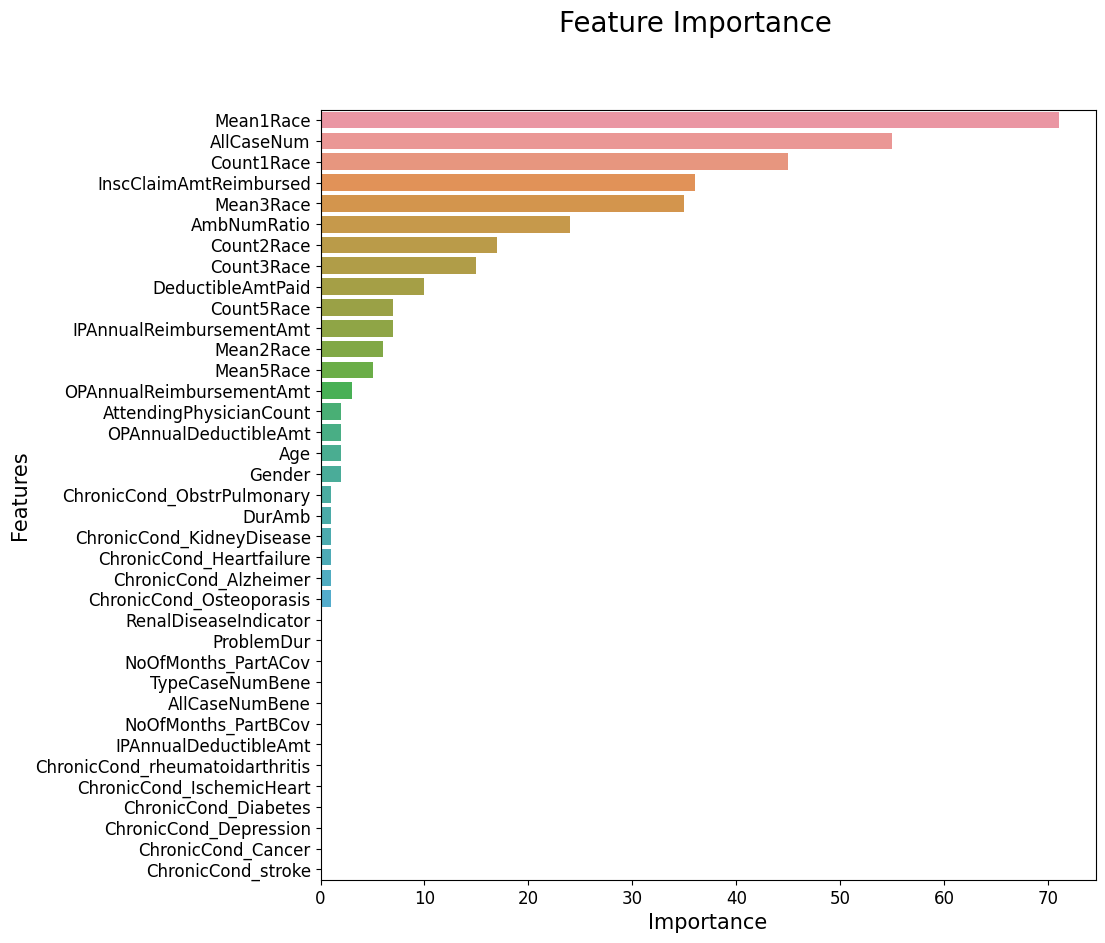

In [ ]:
lgb_train = lgb.Dataset(train_df[FEATURES], train_df['PotentialFraud'])
lgb_valid = lgb.Dataset(test_df[FEATURES], test_df['PotentialFraud'])
params = {'objective': 'binary',
          'seed': 42,
          'metric': 'auc',
          'num_leaves': 50,
          'feature_fraction': 0.8,
          'bagging_freq': 10,
          'bagging_fraction': 0.80,
          'max_depth': 5,
          'min_data_in_leaf': 50
}
model = lgb.train(
        params = params,
        train_set = lgb_train,
        num_boost_round = 15,
        callbacks=[lgb.early_stopping(stopping_rounds=3), lgb.log_evaluation(1)],
        valid_sets = [lgb_train, lgb_valid],
)
print('Our Roc Auc score for the validation data is:', roc_auc_score(test_df['PotentialFraud'], model.predict(test_df[FEATURES])))
feature_importance = model.feature_importance()
feature_importance = pd.DataFrame({'Features': FEATURES, 'Importance': feature_importance}).sort_values('Importance', ascending = False)
fig = plt.figure(figsize = (10, 10))
fig.suptitle('Feature Importance', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
sns.barplot(x = feature_importance['Importance'], y = feature_importance['Features'], orient = 'h')
plt.show()

Исследуем пороговую вероятность, при которой метрика F1 максимальна.

In [ ]:
prob = 0
prob_opt = 0
f1_max = 0
while prob <= 1:
  test_preds = model.predict(test_df[FEATURES])
  test_preds = [1 if pred > prob else 0 for pred in test_preds]
  f1 = sklearn.metrics.f1_score(test_df['PotentialFraud'], test_preds)
  if f1 > f1_max:
    f1_max = f1
    prob_opt = prob
  prob = prob + 0.01
print(prob_opt, f1_max)

0.38000000000000017 0.8946394976860855


Выведем матрицу ошибок.

In [ ]:
test_preds = model.predict(test_df[FEATURES])
test_preds = [1 if pred > prob_opt else 0 for pred in test_preds]
sklearn.metrics.confusion_matrix(test_df['PotentialFraud'], test_preds,)

array([[97839,  6087],
       [ 7186, 56352]])

Посчитаем основные метрики: F1, Acc, Prec, Recall, AUC:

In [ ]:
sklearn.metrics.f1_score(test_df['PotentialFraud'], test_preds)

0.8946394976860855

In [ ]:
sklearn.metrics.accuracy_score(test_df['PotentialFraud'], test_preds)

0.9207411742225194

In [ ]:
sklearn.metrics.precision_score(test_df['PotentialFraud'], test_preds)

0.902512852544083

In [ ]:
sklearn.metrics.recall_score(test_df['PotentialFraud'], test_preds)

0.8869023261670181

In [ ]:
roc_auc_score(test_df['PotentialFraud'], model.predict(test_df[FEATURES]))

0.9730121679587646

In [ ]:
conf_matr = sklearn.metrics.confusion_matrix(test_df['PotentialFraud'], test_preds,)
fnr = conf_matr[1, 0]/(conf_matr[1, 0] + conf_matr[1, 1])
fpr = conf_matr[0, 1]/(conf_matr[0, 1] + conf_matr[0, 0])
print('FNR =', fnr)
print('FPR =', fpr)

FNR = 0.11309767383298183
FPR = 0.05857052133248658


Выведем ROC-кривую:

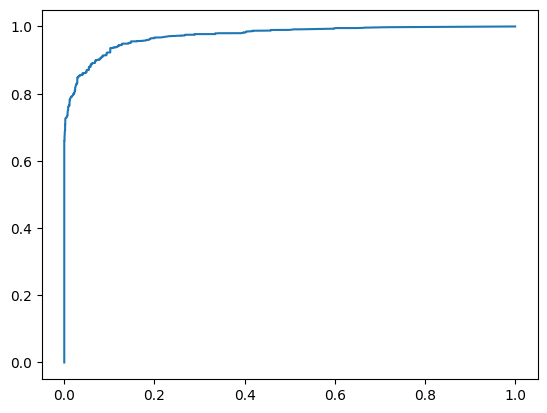

In [ ]:
fpr, tpr, _ = metrics.roc_curve(test_df['PotentialFraud'], model.predict(test_df[FEATURES]))
plt.plot (fpr,tpr)
plt.show()
